# Check point Data Visualization

# Ali LAMINE

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
data= pd.read_csv("C:/Users/LENOVO/Desktop/titanic-passengers.csv", sep=";")

In [3]:
# head of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
# general information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Find missing data
data.isnull().sum().sum()

866

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Ages on the Titanic')

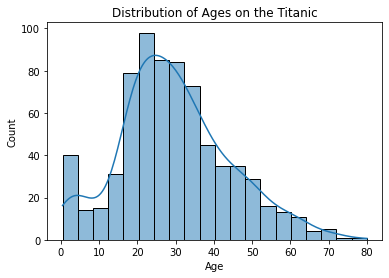

In [10]:
sns.histplot(data["Age"], bins=20, kde=True) 
plt.title("Distribution of Ages on the Titanic")

In [11]:
from scipy import stats
x=data["Age"].dropna()
shapiro_test = stats.shapiro(x)
shapiro_test

ShapiroResult(statistic=0.9814548492431641, pvalue=7.322165629375377e-08)

In [12]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
A19            1
D56            1
D15            1
A14            1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [14]:
# Replacing missing numerical values in "Age" with the median
data["Age"].fillna(data["Age"].median(), inplace=True)

In [15]:
# Replacing missing values in "Embarked" with the most frequent variable 
data["Embarked"].fillna(data["Embarked"].value_counts().index[0], inplace=True)

In [16]:
# Replacing missing values in "Cabin" by "unkown"
data["Cabin"].fillna("unknown", inplace=True)

In [17]:
# verification of the missing values 
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Text(0.5, 1.0, 'Survival proportions on the Titanic')

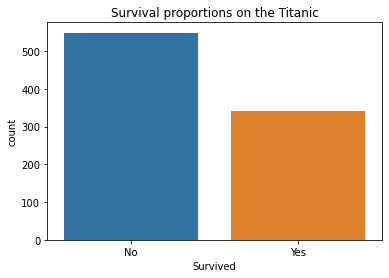

In [18]:
# Bar plots of "Survival"
sns.countplot(data=data, x="Survived" )
plt.title("Survival proportions on the Titanic")

Text(0.5, 1.0, 'Proportion of classes on the Titanic')

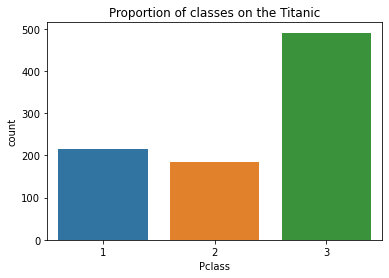

In [19]:
# Bar plots of "Pclass"
sns.countplot(data=data, x="Pclass" )
plt.title("Proportion of classes on the Titanic")

Text(0.5, 1.0, "Gender's proportions")

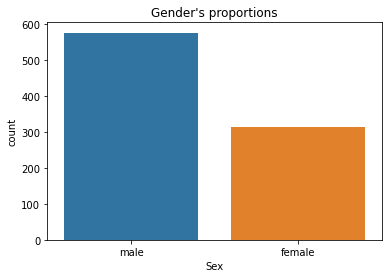

In [20]:
# Bar plots of "Sex"
sns.countplot(data=data, x="Sex" )
plt.title("Gender's proportions")

Text(0.5, 1.0, 'Harbours of embarkment')

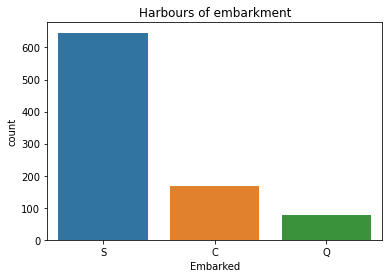

In [21]:
# Bar plots of "Embarked"
sns.countplot(data=data, x="Embarked" )
plt.title("Harbours of embarkment")

Text(0.5, 1.0, 'Proportions of passengers with siblings and spouses')

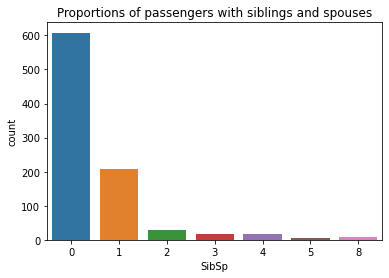

In [22]:
# Bar plots of "SibSp"
sns.countplot(data=data, x="SibSp" )
plt.title("Proportions of passengers with siblings and spouses")

Text(0.5, 1.0, 'Proportions of passengers with parents and children')

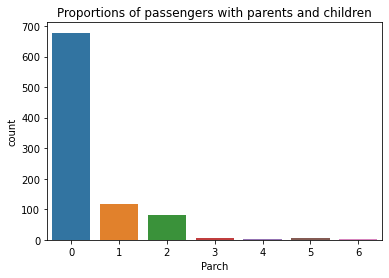

In [23]:
# Bar plots of "Parch"
sns.countplot(data=data, x="Parch")
plt.title("Proportions of passengers with parents and children")

Text(0.5, 1.0, 'Distribution of ages')

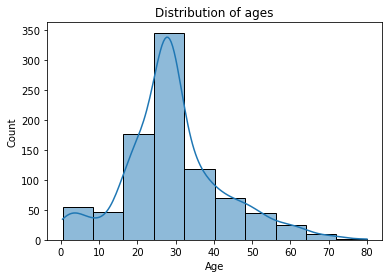

In [24]:
# Histogram of "Age"
sns.histplot(data["Age"], bins=10, kde=True) 
plt.title("Distribution of ages")

Text(0.5, 1.0, "Distribution of tickets' prices in pounds")

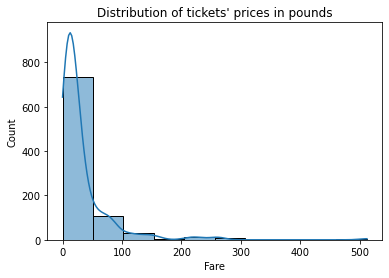

In [25]:
# Histogram of "Fare"
sns.histplot(data["Fare"], bins=10, kde=True) 
plt.title("Distribution of tickets' prices in pounds")

The ticket price had reached 500 pounds but the majority of the passengers had a ticket less than 100 pounds. A possible correlation with "Pclass". 

Text(0.5, 1.0, 'Grouped Boxplots of the Age')

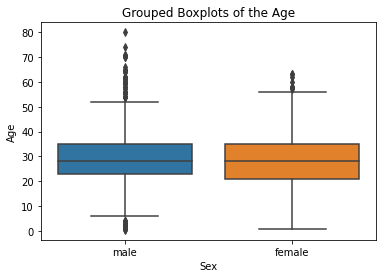

In [26]:
# box plot of "Age" and "Sex"
sns.boxplot(data= data, y="Age", x="Sex") 
plt.title("Grouped Boxplots of the Age")

Text(0.5, 1.0, 'Grouped Boxplot of the Age depending on the survival')

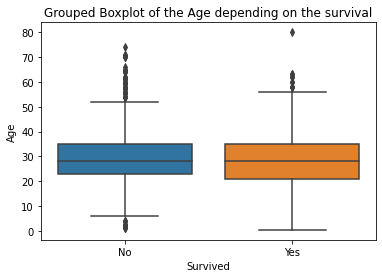

In [27]:
# box plot of "Age" and "Survived"
sns.boxplot(data= data, y="Age", x="Survived") 
plt.title("Grouped Boxplot of the Age depending on the survival")

Text(0.5, 1.0, 'Distribution of the survival depending on the gender')

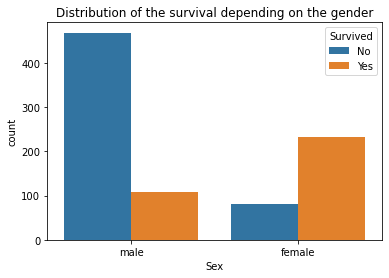

In [28]:
# bar plot of "Sex" and "Survived"
sns.countplot(data= data, x="Sex", hue="Survived") 
plt.title("Distribution of the survival depending on the gender")

Text(0.5, 1.0, 'Grouped Boxplots of the Age depending on the survival and the gender')

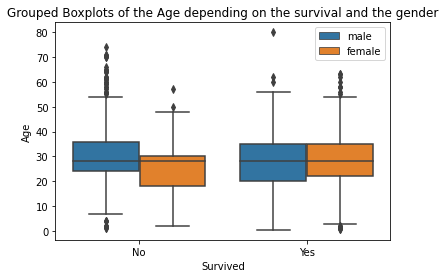

In [29]:
# Box plot of "Age" and "Survived" depending on "Sex"
sns.boxplot(data= data, y="Age", x="Survived", hue="Sex") 
plt.legend()
plt.title("Grouped Boxplots of the Age depending on the survival and the gender")

Text(0.5, 1.0, 'Boxplots of the Fare depending on the survival')

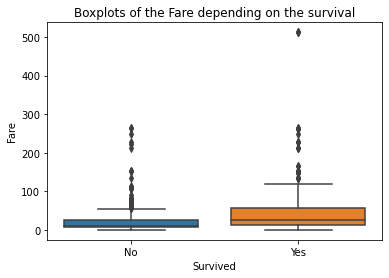

In [30]:
# Box plot of "Fare" and "Survived"
sns.boxplot(data= data, y="Fare", x="Survived") 
plt.title("Boxplots of the Fare depending on the survival")

Text(0.5, 1.0, 'Survival proportions in the 3 classes')

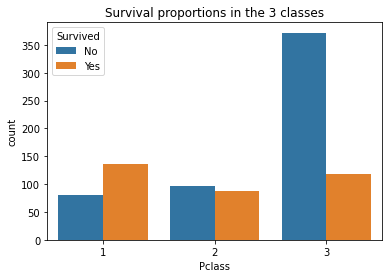

In [31]:
# Bar plot of "Pclass" and "Survived"
sns.countplot(data= data, x="Pclass", hue="Survived") 
plt.title("Survival proportions in the 3 classes")

Text(0.5, 1.0, 'Survival among passensgers with spouses and siblings')

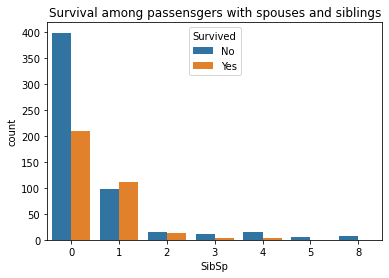

In [32]:
# Bar plot of "SibSp" and "Survived"
sns.countplot(data= data, x="SibSp", hue="Survived")
plt.title("Survival among passensgers with spouses and siblings")

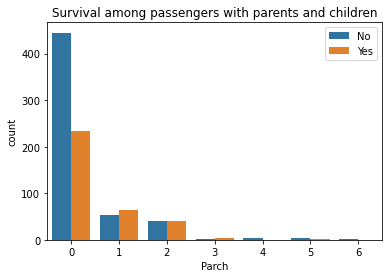

In [33]:
# Bar plot of "Parch" and "Survived"
sns.countplot(data= data, x="Parch", hue="Survived")
plt.title("Survival among passengers with parents and children")
plt.legend( loc='upper right')

In [34]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

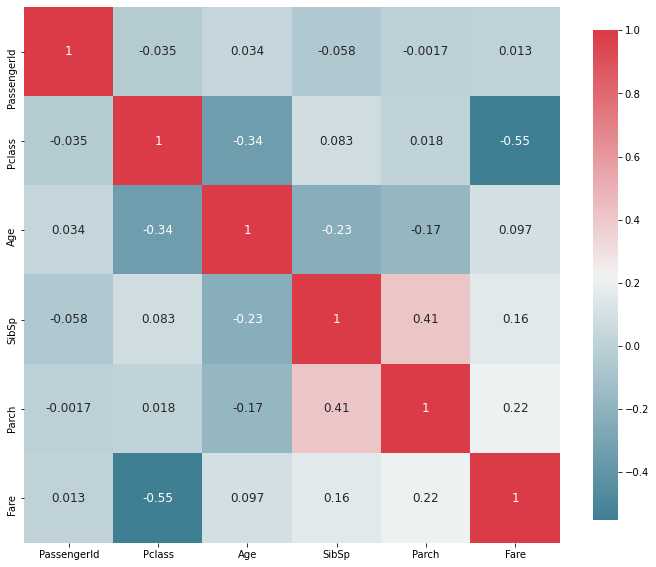

In [35]:
plot_correlation_map(data)

In [36]:
# Counts of "Survived" grouped by "Pclass"
data["Survived"].groupby(data["Pclass"]).value_counts()

Pclass  Survived
1       Yes         136
        No           80
2       No           97
        Yes          87
3       No          372
        Yes         119
Name: Survived, dtype: int64

In [37]:
# Encoding "Survived" into dummy variables in a new column named "encoded"
from sklearn.preprocessing import LabelBinarizer
labelbinarizer= LabelBinarizer()
data["encoded"]=labelbinarizer.fit_transform(data["Survived"])

In [38]:
# Mean of "Survived" grouped by "Pclass"
data["encoded"].groupby(data["Pclass"]).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: encoded, dtype: float64

In [39]:
# Drop "Names" from the dataset
data.drop(["Name"], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,encoded
0,343,No,2,male,28.0,0,0,248740,13.0000,unknown,S,0
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,0
2,641,No,3,male,20.0,0,0,350050,7.8542,unknown,S,0
3,568,No,3,female,29.0,0,4,349909,21.0750,unknown,S,0
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,unknown,C,1
887,61,No,3,male,22.0,0,0,2669,7.2292,unknown,C,0
888,535,No,3,female,30.0,0,0,315084,8.6625,unknown,S,0
889,102,No,3,male,28.0,0,0,349215,7.8958,unknown,S,0


In [40]:
# Creating a "Title" column
Title_Dictionary = {

                    "Capt":      "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }


In [41]:
def title (x):
    for i in range (len(x.split(" "))):
        if x.split(" ")[i][-1]==".":
            return Title_Dictionary[(x.split(" ")[i][:-1])]

data["Title"]=data["Name"].apply(title)
data["Title"].value_counts()
    

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

Text(0.5, 1.0, 'Boxplots of the Age depending on the title')

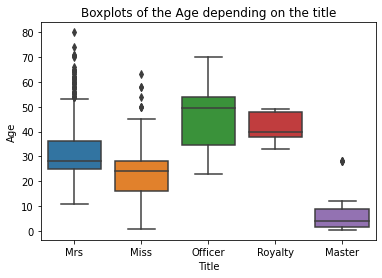

In [42]:
# box plot of "Age" and "Title"
sns.boxplot(data=data, y="Age", x="Title")
plt.title("Boxplots of the Age depending on the title")

Text(0.5, 1.0, 'Boxplot of the Fare depending on the title')

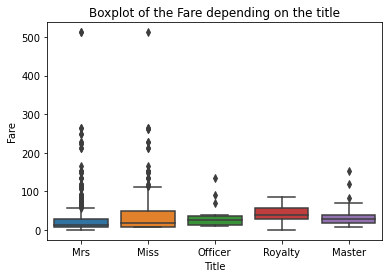

In [43]:
# box plot of "Fare" and "Title"
sns.boxplot(data=data, y="Fare", x="Title") 
plt.title("Boxplot of the Fare depending on the title")

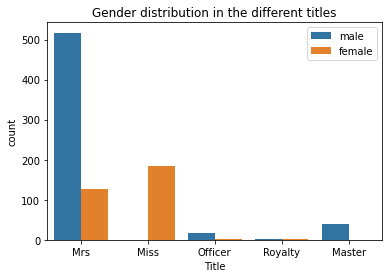

In [44]:
# bar plot of "Sex" and "Title"
sns.countplot(data= data, hue="Sex", x="Title") 
plt.title("Gender distribution in the different titles")
plt.legend(loc="upper right")

Text(0.5, 1.0, 'Survival within the different titles')

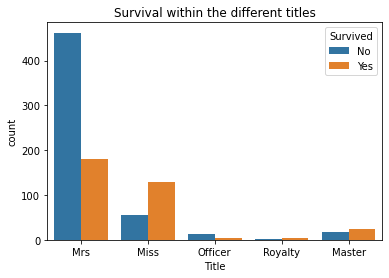

In [45]:
# bar plot of "Sex" and "Title"
sns.countplot(data= data, hue="Survived", x="Title") 
plt.title("Survival within the different titles")

In [46]:
# Creation of "FamilySize" column
data["FamilySize"]= data["SibSp"] + data["Parch"]
data["FamilySize"].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: FamilySize, dtype: float64

Text(0.5, 1.0, 'Boxplots of the family size depending on the title')

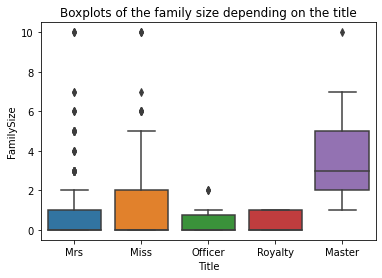

In [47]:
# box plot of "FamilySize" and "Title"
sns.boxplot(data=data, y="FamilySize", x="Title") 
plt.title("Boxplots of the family size depending on the title")

Text(0.5, 1.0, 'Boxplots of the family size depending on the survival')

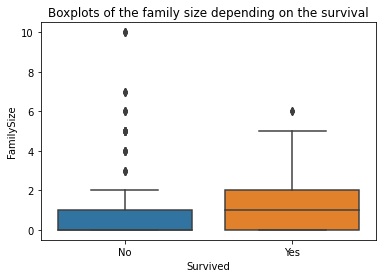

In [48]:
# box plot of "FamilySize" and "Survived"
sns.boxplot(data=data, y="FamilySize", x="Survived") 
plt.title("Boxplots of the family size depending on the survival")

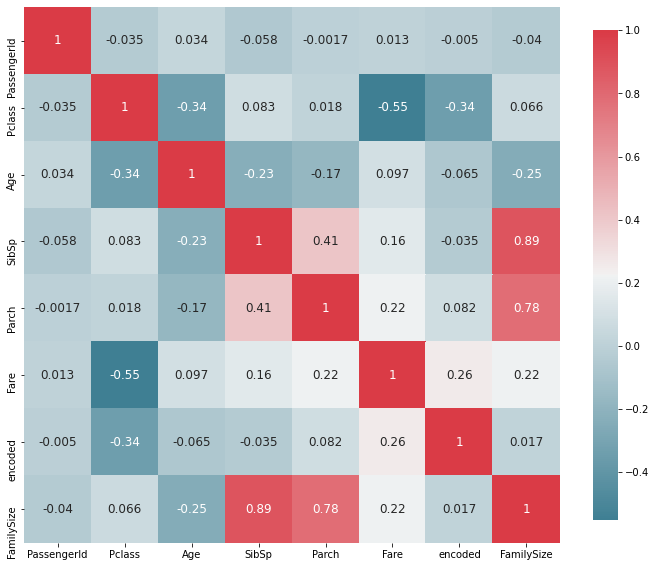

In [49]:
plot_correlation_map(data)

# Summary